# Проект: Исследовательский анализ данных

Задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

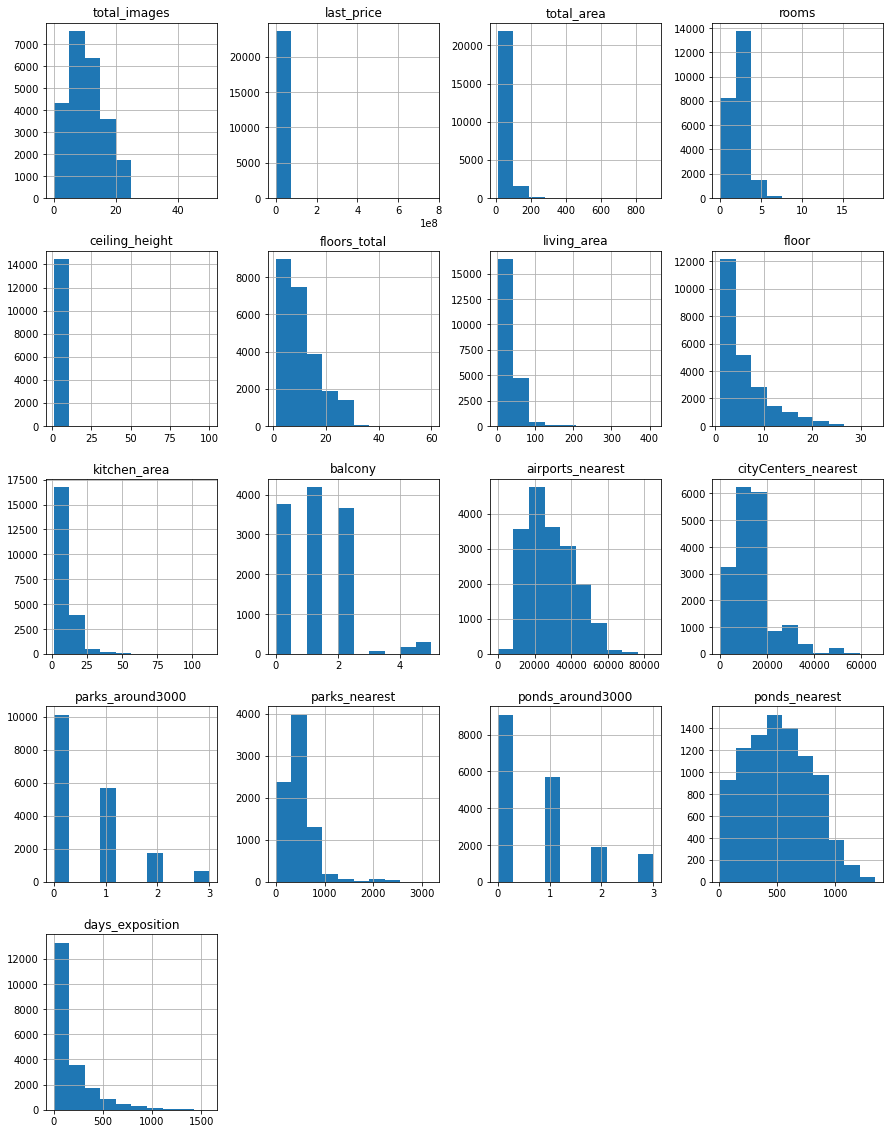

In [5]:
df.hist(figsize=(15, 20))

In [6]:
df[df['ceiling_height'] > 4]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
154,1,8200000.0,80.0,2018-11-06T00:00:00,3,4.15,3.0,44.2,2,NaN,...,12.2,NaN,Санкт-Петербург,20562.0,3167.0,2.0,344.0,1.0,838.0,38.0
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.00,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.20,8.0,159.5,7,NaN,...,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.30,3.0,190.0,3,NaN,...,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1053,13,550000.0,29.0,2018-02-01T00:00:00,1,5.00,3.0,NaN,1,False,...,NaN,NaN,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22309,20,5300000.0,45.0,2017-09-30T00:00:00,1,10.30,16.0,15.5,15,NaN,...,NaN,NaN,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
22336,19,9999000.0,92.4,2019-04-05T00:00:00,2,32.00,6.0,55.5,5,False,...,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
22494,7,91075000.0,491.0,2017-05-27T00:00:00,5,4.20,9.0,274.0,9,NaN,...,45.0,0.0,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,115.0
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.00,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


### Шаг 2. Предобработка данных

#### Пропуски

Посмотрим в каких полях содержаться пропущенные значения

In [7]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Поля, в которых можно заполнить пропущенные значения
- balcony если продавец не указал число балконов, то, скорее всего, в его квартире их нет и пропущенные значения можно заменить на 0
- parks_around3000 если пропущено число парков, то, скорее всего, поблизости их нет и пропущенные значения можно заменить на 0
- ponds_around3000 если пропущено число водоемов поблизости, то, скорее всего, поблизости их нет и пропущенные значения можно заменить на 0
- is_apartment вероятнее всего, квартиры с пропущенными значениями не являются аппартаментами и продавец просто это не указывал, поэтому проппуски можно заполнить отрицательным значением

In [8]:
df['balcony'] = df['balcony'].fillna(value=0)
df['parks_around3000'] = df['parks_around3000'].fillna(value=0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(value=0)
df['is_apartment'] = df['is_apartment'].fillna(value=False)

Поля, которые необходимо преобразовать в другой тип
- first_day_exposition (object в datetime)
- is_apartment (object в bool) потому что поле может принимать только два значения
- balcony (float в int, потому что количество балконов целое число)
- parks_around3000 (float в int, потому что количество парков поблизости целое число)
- ponds_around3000 (float в int, потому что количество водоемов поблизости целое число)

In [9]:
df['first_day_exposition'] = pd.to_datetime(
    df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S"
)
df['is_apartment'] = df['is_apartment'].astype('bool')
df['balcony'] = df['balcony'].astype('int64')
df['parks_around3000'] = df['parks_around3000'].astype('int64')
df['ponds_around3000'] = df['ponds_around3000'].astype('int64')

#### Неявные дубликаты

Изучим уникальные значения в столбце с названиями местоположения

In [10]:
df["locality_name"].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Видно, что содержится много дубликатов, причиной которых является использвание символов 'е' и 'ё'. Также есть дубликаты из-за разного указания статуса населенного пункта, например, «поселок Рябово» и «поселок городского типа Рябово». Чтобы исключить это, добавим новый столбец "clean_name", где будет содержатся только название населенных пунктов

In [11]:
stopwords = ['городской', 'городского', 'типа', 'посёлок', 'коттеджный',
             'поселок', 'деревня', 'при', 'железнодорожной', 'станции',
            'садоводческое', 'некоммерческое', 'товарищество', 'садовое', 'село']
new_words = []
stopword_re = re.compile("|".join(r"\b%s\b" % re.escape(word) for word in stopwords))
df["clean_name"] = df["locality_name"].replace(stopword_re, "")
df["clean_name"] = df[~df["clean_name"].isna()]["clean_name"].str.strip()

#### Аномальные значения

Проанализировав гистограммы, можем предположить и исследовать на аномальные значения следующие поля:
- last_price
- total_area
- rooms
- ceiling_height
- balcony

Проанализируем квартиры с высокими ценами на аномальность

In [12]:
df[df["last_price"] > 2e8]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_name
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7.0,95.0,5,False,...,0,Санкт-Петербург,23011.0,1197.0,3,519.0,3,285.0,233.0,Санкт-Петербург
5893,3,230000000.0,500.0,2017-05-31,6,NaN,7.0,NaN,7,False,...,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,50.0,Санкт-Петербург
12971,19,763000000.0,400.0,2017-09-30,7,NaN,10.0,250.0,10,False,...,2,Санкт-Петербург,25108.0,3956.0,1,530.0,3,756.0,33.0,Санкт-Петербург
13749,7,240000000.0,410.0,2017-04-01,6,3.40,7.0,218.0,7,False,...,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,199.0,Санкт-Петербург
14706,15,401300000.0,401.0,2016-02-20,5,NaN,9.0,204.0,9,False,...,3,Санкт-Петербург,21912.0,2389.0,1,545.0,1,478.0,393.0,Санкт-Петербург
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7.0,258.0,5,False,...,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,111.0,Санкт-Петербург
16461,17,245000000.0,285.7,2017-04-10,6,3.35,7.0,182.8,4,False,...,0,Санкт-Петербург,33143.0,6235.0,3,400.0,3,140.0,249.0,Санкт-Петербург
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,...,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0,Санкт-Петербург
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6.0,63.7,6,False,...,0,Санкт-Петербург,22494.0,1073.0,3,386.0,3,188.0,NaN,Санкт-Петербург


Из выборки видно, что вероятнее всего это элитные квартиры, так как имеют большую площадь с высокими потолками, находятся в черте города. Однозначно сказать, что это выбросы нельзя, поэтому пока оставим как есть

Проанализируем квартиры с большими площадями на анамальность

In [13]:
df[df["total_area"] > 500]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_name
3117,19,140000000.0,631.0,2019-03-30,7,NaN,5.0,NaN,5,False,...,0,Санкт-Петербург,25707.0,4972.0,0,NaN,2,210.0,NaN,Санкт-Петербург
4237,1,50000000.0,517.0,2017-10-14,7,NaN,4.0,332.0,3,False,...,0,Санкт-Петербург,22835.0,1847.0,2,477.0,2,540.0,NaN,Санкт-Петербург
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,...,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14.0,Санкт-Петербург
8018,20,84000000.0,507.0,2015-12-17,5,4.45,7.0,301.5,7,True,...,1,Санкт-Петербург,NaN,5735.0,2,110.0,0,NaN,1078.0,Санкт-Петербург
12859,20,140000000.0,631.2,2019-04-09,7,3.90,4.0,322.3,4,False,...,1,Санкт-Петербург,25707.0,4972.0,0,NaN,2,210.0,NaN,Санкт-Петербург
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7.0,258.0,5,False,...,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,111.0,Санкт-Петербург
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,...,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0,Санкт-Петербург


С площадью такая же картина, как и с ценой. Оставим пока как есть

Посмотрим на комнаты. Количество квартир с больше чем 7 комнат незначительное, да и варианты с бОльшим количеством комнат выглядят очень подозрительно, поэтому решено создать дополнительный столбец и объединить эти квартиры в группу 7+ комнат

In [14]:
df["rooms_count_group"] = df["rooms"]
df['rooms_count_group'] = df['rooms_count_group'].astype('str')
df.loc[(df["rooms"] >= 7), 'rooms_count_group'] = '7+'

Найдем и удалим редкие и выбивающиеся значения. Потолки меньше 2.4-х и больше 32-х метров, а также в диапазоне (6, 20)

In [15]:
df.loc[(df["ceiling_height"] < 2.4) | (df["ceiling_height"] > 32), 'ceiling_height'] = None
df.loc[(df["ceiling_height"] >= 6) & (df["ceiling_height"] <= 24), 'ceiling_height'] = None

Поправим значения в диапазоне 20 - 32, вероятнее всего это диапазон 

In [16]:
df.loc[(df["ceiling_height"] > 24), 'ceiling_height'] = df.loc[(df['ceiling_height'] > 24), 'ceiling_height'] / 10

### Шаг 3. Добавьте в таблицу новые столбцы

Цена одного квадратного метра

In [41]:
df['price_per_meter'] = df['last_price'] / df['total_area']

День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [42]:
df['weekday'] = df['first_day_exposition'].dt.weekday

Месяц публикации объявления

In [43]:
df['month'] = df['first_day_exposition'].dt.month

Год публикации объявления

In [44]:
df['year'] = df['first_day_exposition'].dt.year

Тип этажа квартиры (значения — «‎первый», «последний», «другой»)

In [45]:
def floor_group(data):
    """
    Возвращает тип этажа квартиры
    """
    if data['floor'] == 1:
        return 'первый'
    if data['floor'] == data['floors_total']:
        return 'последний'
    return 'другой' 

df['floor_group'] = df.apply(floor_group, axis=1)

Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)

In [46]:
df["cityCenters_nearest_km"] = (df["cityCenters_nearest"] / 1000).round()

### Шаг 4. Проведите исследовательский анализ данных:

Общая площадь

<AxesSubplot:>

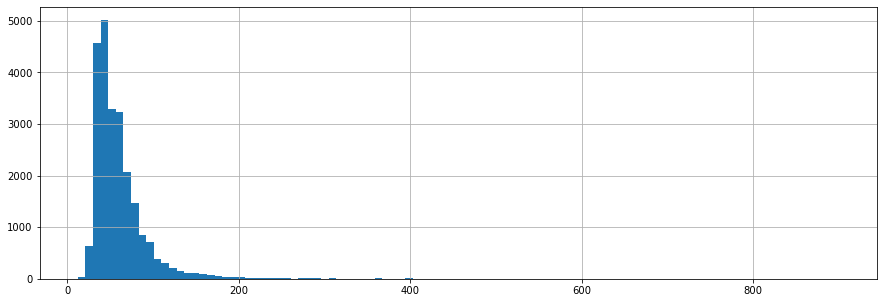

In [23]:
df['total_area'].hist(bins=100, figsize=(15, 5))

Жилая площадь

<AxesSubplot:>

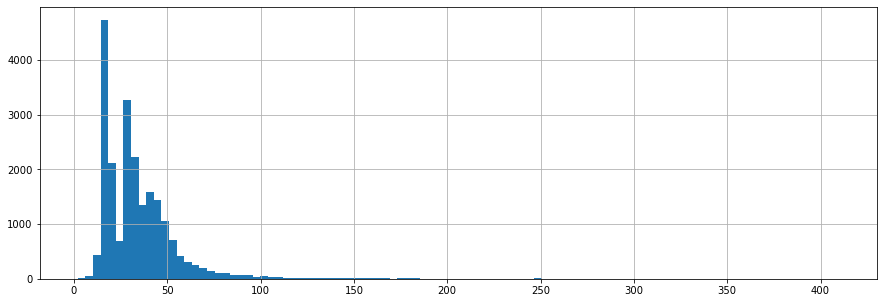

In [24]:
df['living_area'].hist(bins=100, figsize=(15, 5))

Площадь кухни

<AxesSubplot:>

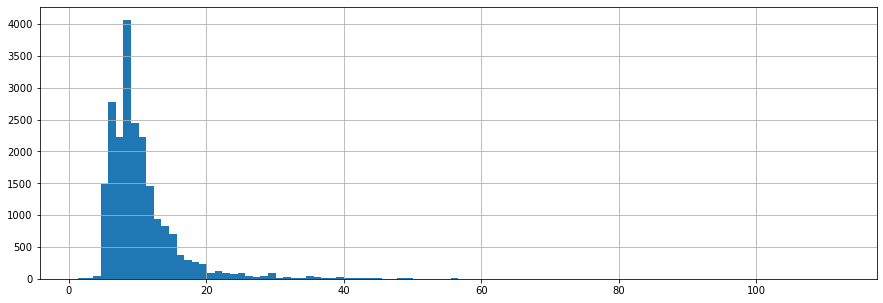

In [25]:
df['kitchen_area'].hist(bins=100, figsize=(15, 5))

Цена объекта

<AxesSubplot:>

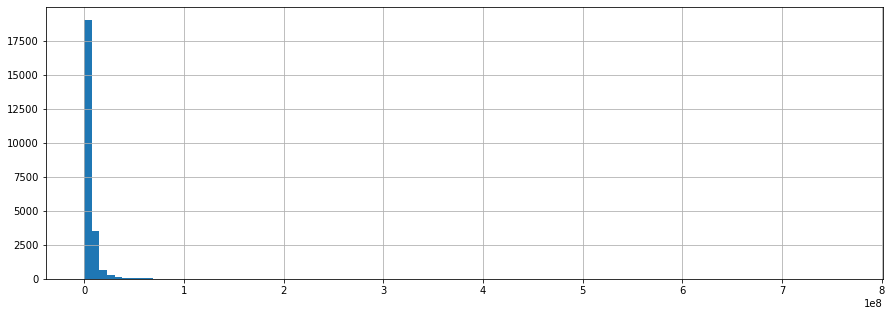

In [26]:
df['last_price'].hist(bins=100, figsize=(15, 5))

Количество комнат

<AxesSubplot:>

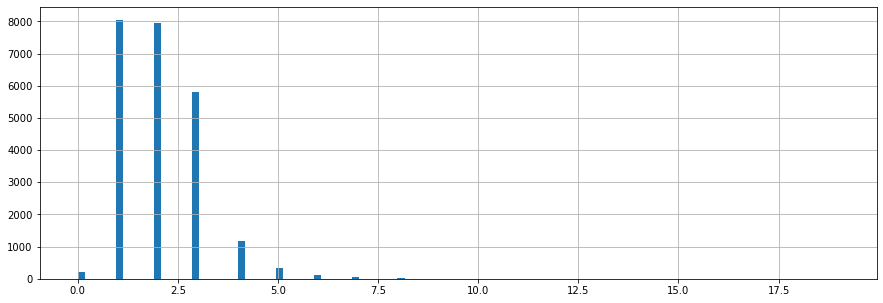

In [27]:
df['rooms'].hist(bins=100, figsize=(15, 5))

Высота потолков

<AxesSubplot:>

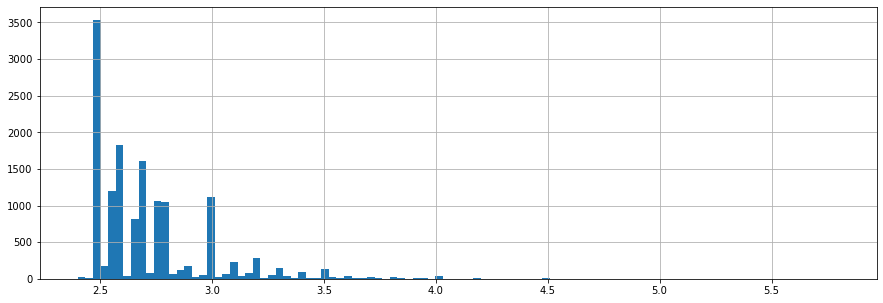

In [28]:
df['ceiling_height'].hist(bins=100, figsize=(15, 5))

Этаж квартиры

<AxesSubplot:>

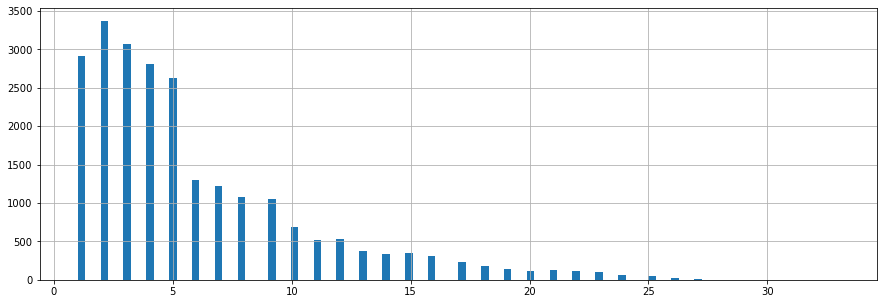

In [29]:
df['floor'].hist(bins=100, figsize=(15, 5))

Тип этажа квартиры («первый», «последний», «другой»)

<AxesSubplot:>

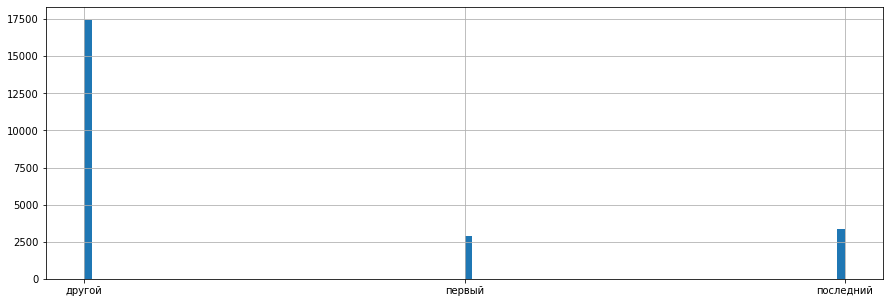

In [30]:
df['floor_group'].hist(bins=100, figsize=(15, 5))

Общее количество этажей в доме

<AxesSubplot:>

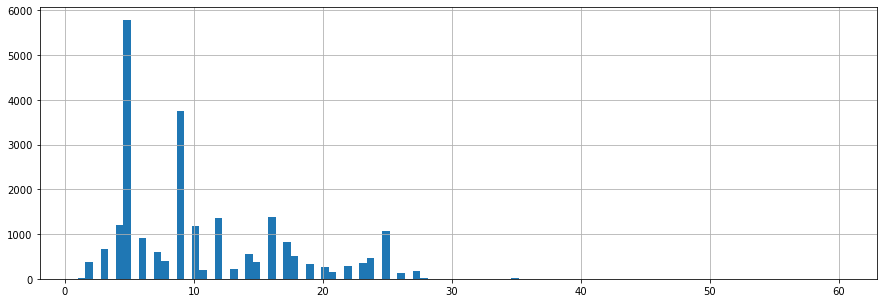

In [32]:
df['floors_total'].hist(bins=100, figsize=(15, 5))

Расстояние до центра города в метрах

<AxesSubplot:>

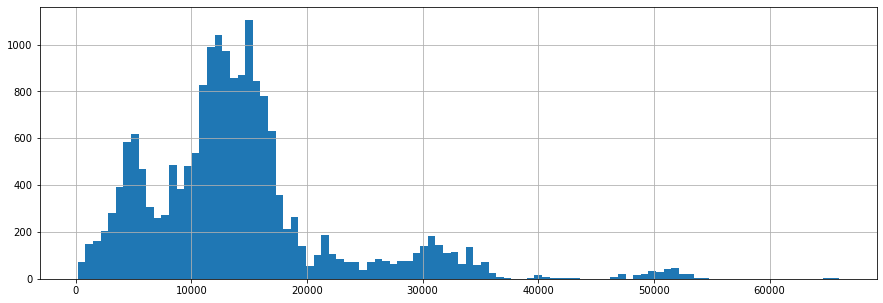

In [37]:
df['cityCenters_nearest'].hist(bins=100, figsize=(15, 5))

Расстояние до ближайшего аэропорта

<AxesSubplot:>

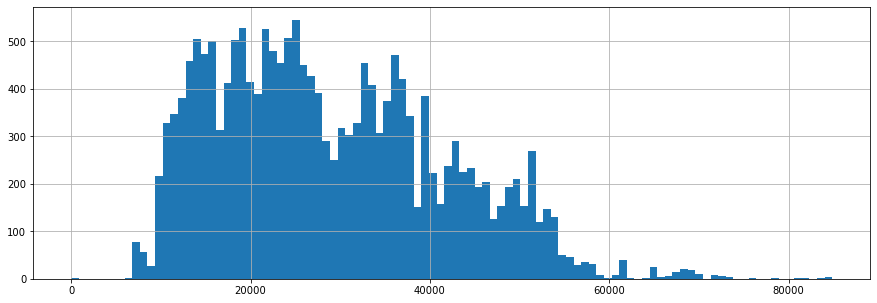

In [34]:
df['airports_nearest'].hist(bins=100, figsize=(15, 5))

Расстояние до ближайшего парка

<AxesSubplot:>

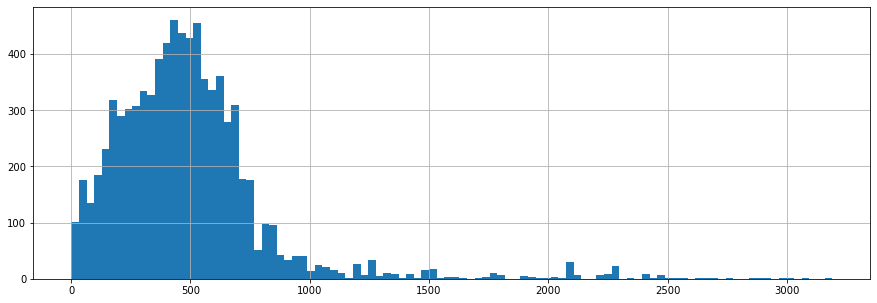

In [35]:
df['parks_nearest'].hist(bins=100, figsize=(15, 5))

День и месяц публикации объявления

<AxesSubplot:>

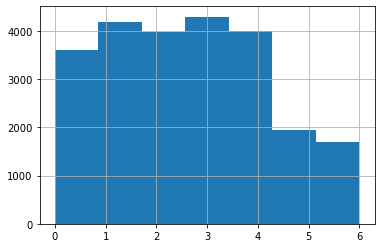

In [40]:
df['weekday'].hist(bins=7)

<AxesSubplot:>

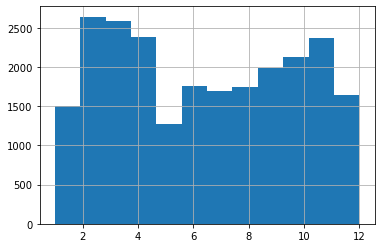

In [48]:
df['month'].hist(bins=12)

Посмотрим как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 

<AxesSubplot:>

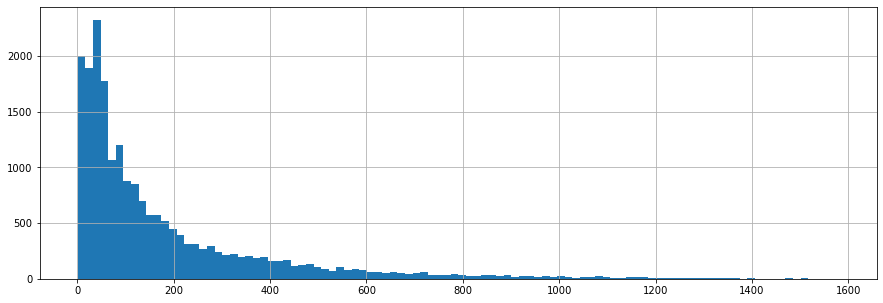

In [70]:
df['days_exposition'].hist(bins=100, figsize=(15, 5))

In [77]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

В среднем квартиры продаются за 180 дней, однако медианой является значение в 95 дней.

Зависимость цены квартиры от общей площади:

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

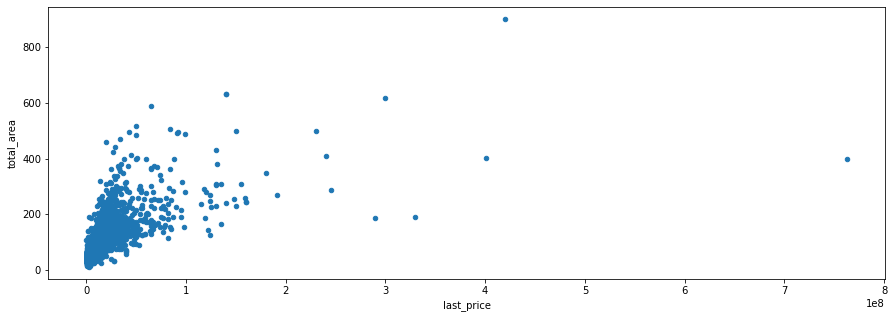

In [79]:
df.plot(x='last_price', y='total_area', kind='scatter', figsize=(15, 5))

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

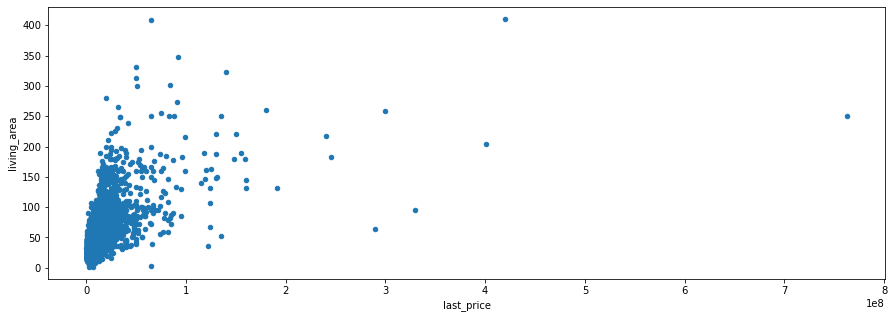

In [54]:
df.plot(x='last_price', y='living_area', kind='scatter', figsize=(15, 5))

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

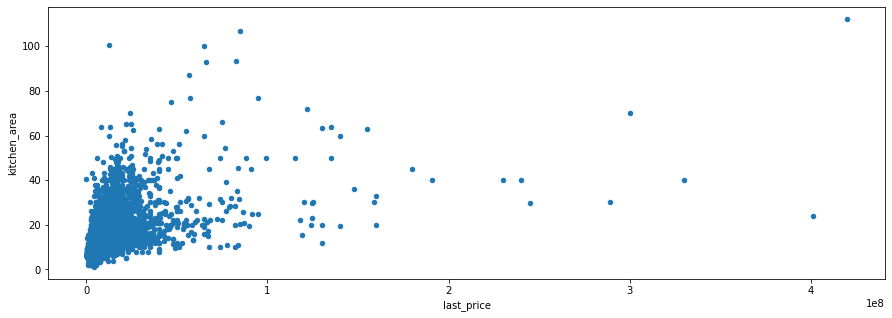

In [55]:
df.plot(x='last_price', y='kitchen_area', kind='scatter', figsize=(15, 5))

<AxesSubplot:xlabel='rooms_count_group'>

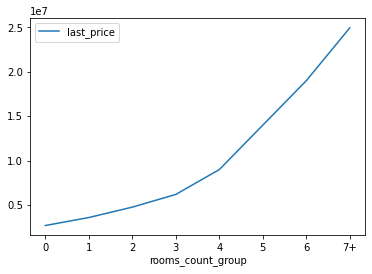

In [91]:
rooms_count_stat = pd.pivot_table(df, index='rooms_count_group', values='last_price', aggfunc='median')
rooms_count_stat.plot()

In [94]:
pd.pivot_table(df, index='floor_group', values='last_price', aggfunc='median')

,last_price
floor_group,
другой,4850000.0
первый,3900000.0
последний,4300000.0


<AxesSubplot:xlabel='weekday'>

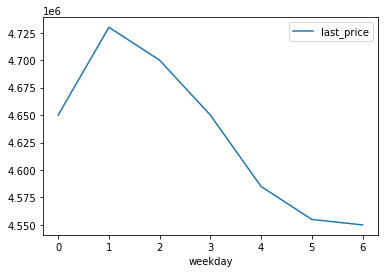

In [97]:
pd.pivot_table(df, index='weekday', values='last_price', aggfunc='median').plot()

<AxesSubplot:xlabel='month'>

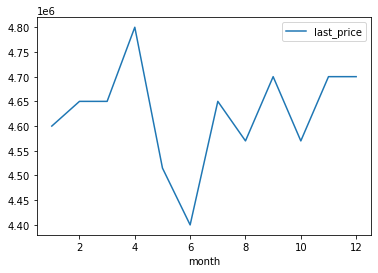

In [99]:
pd.pivot_table(df, index='month', values='last_price', aggfunc='median').plot()

<AxesSubplot:xlabel='year'>

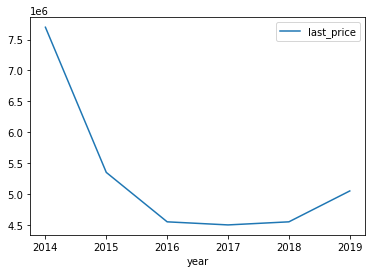

In [100]:
pd.pivot_table(df, index='year', values='last_price', aggfunc='median').plot()